# Void Number density

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.cosmology import LambdaCDM

In [9]:
cosmo = LambdaCDM(H0=100, Om0=0.3089, Ode0=0.6911)
cosmomice = LambdaCDM(H0=100, Om0=0.25, Ode0=0.75)

In [45]:
Mr = 20
Delta = 0.9

In [46]:
L_mg = np.loadtxt(f'cats/voids_MG_Mr-{Mr}_Delta-{Delta}.dat').T
L_gr = np.loadtxt(f'cats/voids_GR_Mr-{Mr}_Delta-{Delta}.dat').T
L_mice = np.loadtxt('../../FAMAF/Lensing/cats/MICE/voids_MICE.dat').T

New catalogs columns name

| 0     | 1        | 2        | 3   | 4     | 5     | 6     | 7          | 8          | 9    | 10   | 11   |
|-------|----------|----------|-----|-------|-------|-------|------------|------------|------|------|------|
| $R_v$ | $\alpha$ | $\delta$ | $z$ | $x_v$ | $y_v$ | $z_v$ | $\Delta_1$ | $\Delta_2$ | LogP | Diff | flag |

In [47]:
L_mg = L_mg[:,L_mg[11] >= 2.0]
L_gr = L_gr[:,L_gr[11] >= 2.0]
L_mice = L_mice[:,L_mice[11] >= 2.0]

In [ ]:
# rho1_MG_21_08 = L_mg[7]
# rho1_MG_21_09 = L_mg[7]
# rho1_MG_20_08 = L_mg[7]
# rho1_MG_20_09 = L_mg[7]


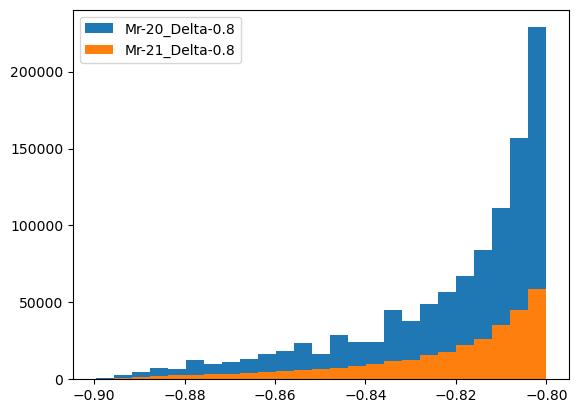

In [51]:
plt.hist(rho1_MG_20_08, bins=25, label='Mr-20_Delta-0.8')
# plt.hist(rho1_MG_20_09, bins=25, label='Mr-20_Delta-0.9')
plt.hist(rho1_MG_21_08, bins=25, label='Mr-21_Delta-0.8')
# plt.hist(rho1_MG_21_09, bins=25, label='Mr-21_Delta-0.9')
plt.legend()

In [33]:
Rv = np.array([[rvbins[j],rvbins[j+1]] for j in range(M-1)])
print(Rv)

[[ 7.39937    10.62495695]
 [10.62495695 15.25666511]
 [15.25666511 21.90746104]
 [21.90746104 31.45752007]
 [31.45752007 45.17071   ]]


(array([291., 149.,  78.,  53.,  36.,  11.,   6.,   3.,   2.,   4.]),
 array([31.46408 , 32.734271, 34.004462, 35.274653, 36.544844, 37.815035,
        39.085226, 40.355417, 41.625608, 42.895799, 44.16599 ]),
 <BarContainer object of 10 artists>)

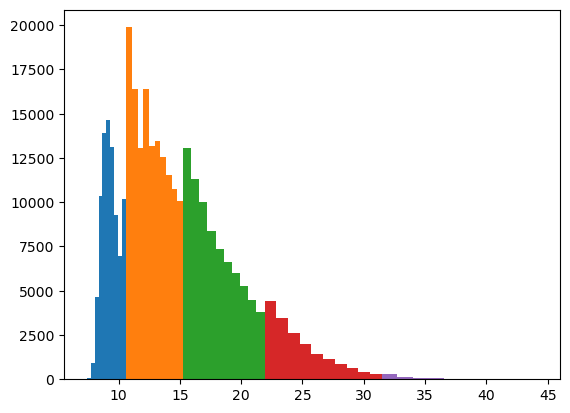

In [26]:
plt.hist((L_mg[0,masks_mg[0]]),bins=10)
plt.hist((L_mg[0,masks_mg[1]]),bins=10)
plt.hist((L_mg[0,masks_mg[2]]),bins=10)
plt.hist((L_mg[0,masks_mg[3]]),bins=10)
plt.hist((L_mg[0,masks_mg[4]]),bins=10)

In [10]:
N = 50
zbins = np.linspace(0.1,0.6,N)
z = zbins[:-1] + np.diff(zbins)*0.5
comdist = cosmo.comoving_distance(zbins).value
comdist_mice = cosmomice.comoving_distance(zbins).value
x = comdist[:-1] + np.diff(comdist)*0.5
x_mice = comdist_mice[:-1] + np.diff(comdist_mice)*0.5
volcom = np.array([4/3 * np.pi * (comdist[j+1]**3 - comdist[j]**3) for j in range(N-1)])
volcom_mice = np.array([4/3 * np.pi * (comdist_mice[j+1]**3 - comdist_mice[j]**3) for j in range(N-1)]) / 8

In [11]:
vdist_mg = np.array([np.sqrt(np.sum(L_mg[4:7, masks_mg[j]]**2,axis=0)) for j in range(M-1)])
vdist_gr = np.array([np.sqrt(np.sum(L_gr[4:7, masks_gr[j]]**2,axis=0)) for j in range(M-1)])
vdist_mice = np.array([np.sqrt(np.sum(L_mice[5:8, masks_mice[j]]**2,axis=0)) for j in range(M-1)])

/tmp/ipykernel_19961/769621352.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vdist_mg = np.array([np.sqrt(np.sum(L_mg[4:7, masks_mg[j]]**2,axis=0)) for j in range(M-1)])
/tmp/ipykernel_19961/769621352.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vdist_gr = np.array([np.sqrt(np.sum(L_gr[4:7, masks_gr[j]]**2,axis=0)) for j in range(M-1)])
/tmp/ipykernel_19961/769621352.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) 

In [12]:
nv_mg = np.array([
    [np.sum((vdist_mg[i] >= comdist[j]) & (vdist_mg[i] < comdist[j+1])) for j in range(N-1)] for i in range(M-1)
])

v_den_mg = nv_mg / volcom
err_v_den_mg = nv_mg/(np.sqrt(nv_mg)*volcom)

/tmp/ipykernel_19961/279768038.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_mg = nv_mg/(np.sqrt(nv_mg)*volcom)


In [13]:
nv_gr = np.array([
    [np.sum((vdist_gr[i] >= comdist[j]) & (vdist_gr[i] < comdist[j+1])) for j in range(N-1)] for i in range(M-1)
])

v_den_gr = nv_gr / volcom
err_v_den_gr = nv_gr/(np.sqrt(nv_gr)*volcom)

/tmp/ipykernel_19961/2137770153.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_gr = nv_gr/(np.sqrt(nv_gr)*volcom)


In [14]:
nv_mice = np.array([
    [np.sum((vdist_mice[i] >= comdist_mice[j]) & (vdist_mice[i] < comdist_mice[j+1])) for j in range(N-1)] for i in range(M-1)
]) / volcom_mice

v_den_mice = nv_mice / volcom_mice
err_v_den_mice = nv_mice / (np.sqrt(nv_mice) * volcom_mice)

/tmp/ipykernel_19961/94269839.py:6: RuntimeWarning: invalid value encountered in divide
  err_v_den_mice = nv_mice / (np.sqrt(nv_mice) * volcom_mice)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


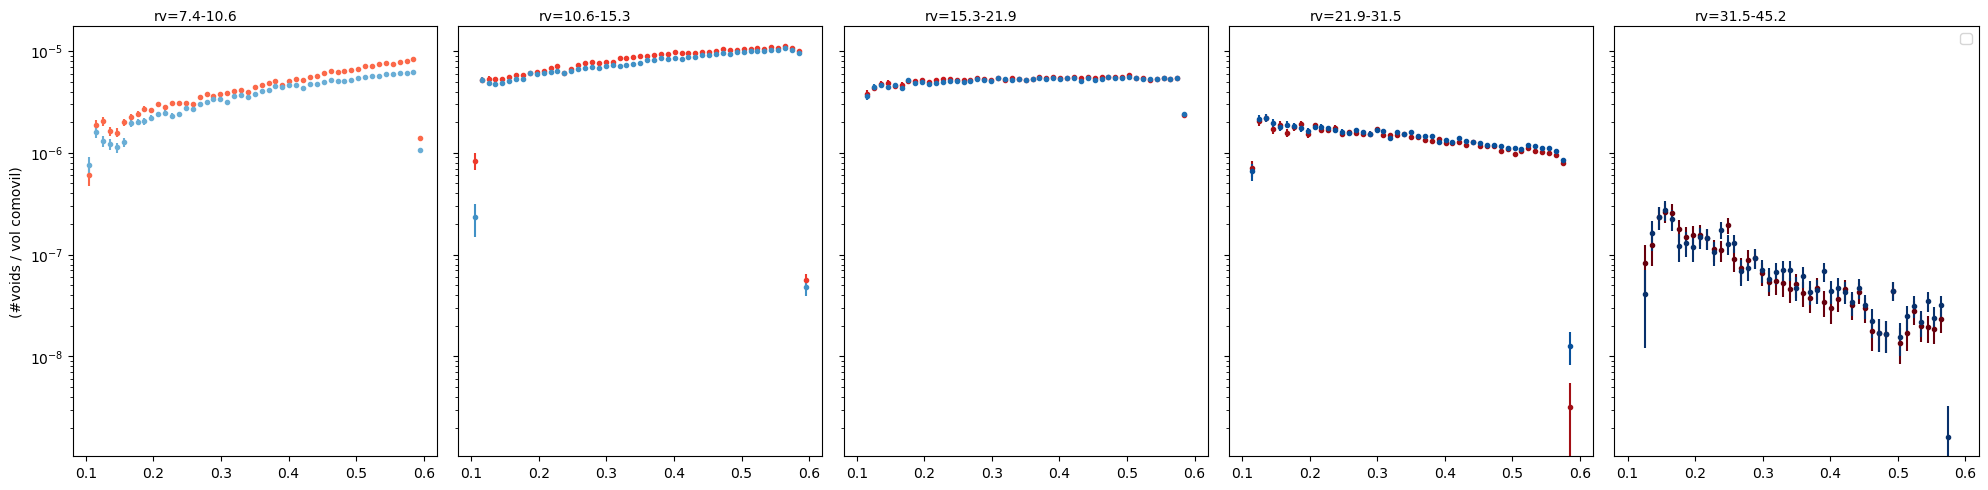

In [15]:
fig, axes = plt.subplots(1,M-1,figsize=(20,5), sharey=True, layout='tight')

colormap = plt.cm.Reds
colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
for i in range(M-1):
    axes[i].errorbar(z, v_den_mg[i], yerr=err_v_den_mg[i], c=colors[i], fmt='.')

colormap = plt.cm.Blues 
colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
for i in range(M-1):
    axes[i].errorbar(z, v_den_gr[i], yerr=err_v_den_gr[i], c=colors[i], fmt='.')

# colormap = plt.cm.Greens 
# colors = [colormap(i) for i in np.linspace(0.5, 1,M-1)]
# for i in range(M-1):
#     axes[i].plot(z, v_den_mice[i], c=colors[i])

for i in range(M-1):
    axes[i].text(0.2, 2e-5, f'rv={np.round(rvbins[i],1)}-{np.round(rvbins[i+1],1)}')

# plt.xlabel('redshift')
axes[0].set_ylabel('(#voids / vol comovil)')
plt.semilogy()
plt.legend()
plt.show()

# Multiplicity function (Verza et al 2024)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def B(S, alpha, beta, gamma):
    return alpha*(1+(beta/S)**gamma)

In [4]:
def dB(S, alpha, beta, gamma):
    return -((alpha*gamma*(beta/S)**gamma)/S)

def D(S):
    ## < (d \delta_S / dS)^2 >
    pass

def S(R):
    ## acá entra la cosmología: en el pwr spt lineal P(k)
    ## \int 1/( 2\pi^2 ) dk k^2 P(k) |W(kR)|^2
    pass

def P(k):
    ## linear pwr spectrum
    pass

def W(k):
    ## top hat filter in fourier space
    pass

In [5]:
def f(S):
    ## multipliticty function
    Gamma_dd = S*D(S) - 1/4
    Bterm = (B(S)/(2*S) - dB(S))**2
    SGterm = S/(2*Gamma_dd)
    term1 = np.sqrt(Gamma_dd/(2*np.pi*S)) * np.exp(- SGterm * Bterm )
    term2 = Bterm/2 * ( np.erf( np.sqrt(SGterm) * Bterm ) + 1 ) 
    fS = np.exp(-B(S)**2/(2*S))/(np.sqrt(2*np.pi*S)) * (term1 + term2)
    return fS

# Halo Mass Function

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from colossus.lss import mass_function
from colossus.cosmology import cosmology

In [7]:
from astropy.io import fits
from astropy.cosmology import LambdaCDMbdaCDM

In [9]:
cosmoparams = {'h':1.0, 'Om0':0.3089, 'Ode0':0.6911}
def vol(z0,z1,
        c=cosmoparams):

    cosmo = LambdaCDM(H0=100.0*c['h'], Om0=c['Om0'], Ode0=c['Ode0'])
    chi = cosmo.comoving_distance([z0,z1]).value
    volcom = 4/3 * np.pi * (chi[1]**3 - chi[0]**3)

    return volcom

In [2]:
### func eli
def compute_differential(logM, Volume,
                         lMmin = 10.5, lMmax = 15.5,
                         nbins = 80):

    lM_bins, lM_step = np.linspace(lMmin,lMmax,nbins,retstep = True)
    
    # Compute differential Halo mass
    H,xbins  = np.histogram(logM, bins = lM_bins)
    lM_dfbins  = xbins[:-1]+0.5*np.diff(xbins)
    delta_logM = xbins[1] - xbins[0]
    H, lM_dfbins = H[H>0],lM_dfbins[H>0]

    dndlM = H/(delta_logM*Volume)
    err = np.sqrt(H)/(delta_logM*Volume)

    return lM_dfbins, dndlM, err

In [163]:
def compute_cumulative(lL,diff):
    delta_x = (lL[-1]-lL[0]) / (lL.size-1)
    cF = np.flipud( # @UndefinedVariable
            np.cumsum( # @UndefinedVariable
                np.flipud( # @UndefinedVariable
                    diff
                )
            )
        ) * delta_x
    return cF, delta_x

In [33]:
GR = np.loadtxt('/home/fcaporaso/modified_gravity/statistics/hmf_GR_n1_z01-06_n80_logm10-15.csv', delimiter=',').T

In [140]:
with fits.open('/home/fcaporaso/cats/L768/GR_cosmohub19016.fits') as f:
    central = f[1].data.kind == 0
    logM_GR = f[1].data.halo_lm[central]
    z_gal_GR = f[1].data.true_redshift_gal[central]

In [141]:
with fits.open('/home/fcaporaso/cats/L768/MG_cosmohub19015.fits') as f:
    central = f[1].data.kind == 0
    logM_MG = f[1].data.halo_lm[central]
    z_gal_MG = f[1].data.true_redshift_gal[central]

In [274]:
GR = compute_differential(logM_GR[(z_gal_GR<0.6)&(z_gal_GR>=0.1)], vol(0.1,0.6))
MG = compute_differential(logM_MG[(z_gal_MG<0.6)&(z_gal_MG>=0.1)], vol(0.1,0.6))

In [275]:
GR_cum = compute_cumulative(GR[0],GR[1])
MG_cum = compute_cumulative(MG[0],MG[1])

In [276]:
z = 0.35
M = np.logspace(11,15,69)

In [277]:
planckcosmology = cosmology.setCosmology('planck15')
mfunc_planck = mass_function.massFunction(M, z, mdef = 'vir', model = 'despali16',q_out='dndlnM')*np.log(10.)

Text(0.5, 0, 'log M')

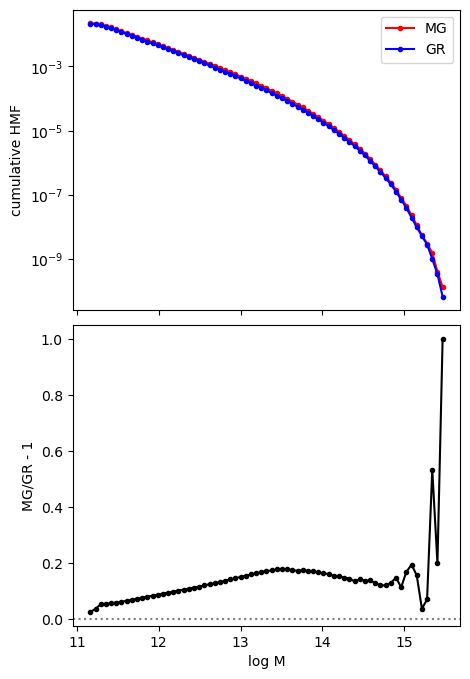

In [278]:
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(5,8))
ax1.plot(MG[0],MG_cum[0],'.-', label='MG', c='r')
ax1.plot(GR[0],GR_cum[0],'.-', label='GR', c='b')
#ax1.set_xlim(11.3,15.5)
#ax1.set_ylim(1e-8,1e-1)
ax1.semilogy()
ax1.legend()
ax1.set_ylabel('cumulative HMF')
#ax1.set_title('GR')
ax2.plot(MG[0],MG_cum[0]/GR_cum[0] - 1, 'k.-')
ax2.set_ylabel('MG/GR - 1')
#ax2.set_ylim(-0.05,0.25)
ax2.axhline(0, ls=':', c='k', alpha=0.5)
fig.subplots_adjust(hspace=0.05,wspace=0.1)
ax2.set_xlabel('log M')

# Lensing

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [52]:
from functools import partial
import astropy.units as u

In [2]:
def cov_matrix(array):
        
    K = len(array)
    Kmean = np.average(array,axis=0)
    bins = array.shape[1]
    
    COV = np.zeros((bins,bins))
    
    for k in range(K):
        dif = (array[k]- Kmean)
        COV += np.outer(dif,dif)        
    
    COV *= (K-1)/K
    return COV

In [5]:
def lenscat_load(Rv_min, Rv_max, z_min, z_max, rho1_min, rho1_max, rho2_min, rho2_max, 
                 flag=2.0, lensname="voids_LCDM_09.dat",
                 split=False, NSPLITS=1,
                 octant=True):

    ## 0:Rv, 1:ra, 2:dec, 3:z, 4:xv, 5:yv, 6:zv, 7:rho1, 8:rho2, 9:logp, 10:diff CdM y CdV, 11:flag
    ## CdM: centro de masa
    ## CdV: centro del void
    L = np.loadtxt('/home/fcaporaso/cats/L768/'+lensname).T

    if octant:
        # selecciono los void en un octante
        eps = 1.0
        L = L[:, (L[1] >= 0.0+eps) & (L[1] <= 90.0-eps) & (L[2]>= 0.0+eps) & (L[2] <= 90.0-eps)]

    nk = 100 ## para cambiarlo hay que repensar el calculo de (dra,ddec) y el doble for loop
    NNN = len(L[0]) ##total number of voids
    ra,dec = L[1],L[2]
    K    = np.zeros((nk+1,NNN))
    K[0] = np.ones(NNN).astype(bool)

    ramin  = np.min(ra)
    cdec   = np.sin(np.deg2rad(dec))
    decmin = np.min(cdec)
    dra    = ((np.max(ra)+1.e-5) - ramin)/10.
    ddec   = ((np.max(cdec)+1.e-5) - decmin)/10.

    c = 1
    for a in range(10): 
        for d in range(10): 
            mra  = (ra  >= ramin + a*dra)&(ra < ramin + (a+1)*dra) 
            mdec = (cdec >= decmin + d*ddec)&(cdec < decmin + (d+1)*ddec) 
            K[c] = ~(mra&mdec)
            c += 1

    mask = (L[0] >= Rv_min) & (L[0] < Rv_max) & (L[3] >= z_min) & (L[3] < z_max) & (
            L[7] >= rho1_min) & (L[7] < rho1_max) & (L[8] >= rho2_min) & (L[8] < rho2_max) & (L[11] >= flag)

    nvoids = mask.sum()
    L = L[:,mask]

    if split:
        if NSPLITS > nvoids:
            NSPLITS = nvoids
        lbins = int(round(nvoids/float(NSPLITS), 0))
        slices = ((np.arange(lbins)+1)*NSPLITS).astype(int)
        slices = slices[(slices < nvoids)]
        L = np.split(L.T, slices)
        K = np.split(K.T, slices)

    return L, K, nvoids


In [183]:
# L_lcdm,_,nv_lcdm = lenscat_load(1.0, 50.0, 0.0, 1.0, -1.0, 0.0, -1.0, 100.0, 
#                  flag=2.0, lensname="voids_LCDM_09.dat",
#                  split=False, NSPLITS=1,
#                  octant=False)
# print(nv_lcdm)
L_fr,_,nv_fr = lenscat_load(10.0, 15.0, 0.2, 0.3, -1.0, 0.0, -1.0, 100.0, 
                 flag=2.0, lensname="voids_fR_09.dat",
                 split=False, NSPLITS=1,
                 octant=False)
print(nv_fr)

28554



(5,10,0.2,0.3,-1,0,-1,100) , N = 3045

(10,15,0.2,0.3,-1,0,-1,100), N = 3342

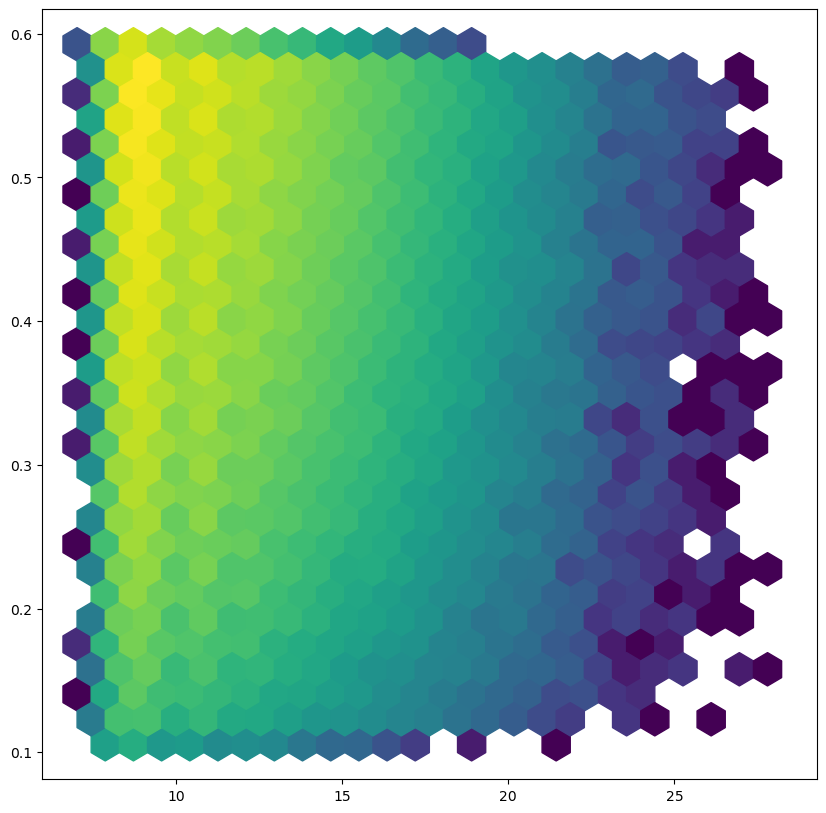

In [134]:
plt.figure(figsize=(10,10))
plt.hexbin(L_fr[0], L_fr[3], gridsize=25, bins='log')

(array([1.14430e+04, 1.37377e+05, 9.61280e+04, 8.83750e+04, 5.75710e+04,
        4.62450e+04, 3.41640e+04, 2.33680e+04, 1.59010e+04, 1.08030e+04,
        6.91800e+03, 4.20900e+03, 2.51900e+03, 1.51500e+03, 7.78000e+02,
        3.24000e+02, 2.71000e+02, 1.13000e+02, 6.00000e+01, 1.10000e+01]),
 array([ 7.0184   ,  8.0787015,  9.139003 , 10.1993045, 11.259606 ,
        12.3199075, 13.380209 , 14.4405105, 15.500812 , 16.5611135,
        17.621415 , 18.6817165, 19.742018 , 20.8023195, 21.862621 ,
        22.9229225, 23.983224 , 25.0435255, 26.103827 , 27.1641285,
        28.22443  ]),
 <BarContainer object of 20 artists>)

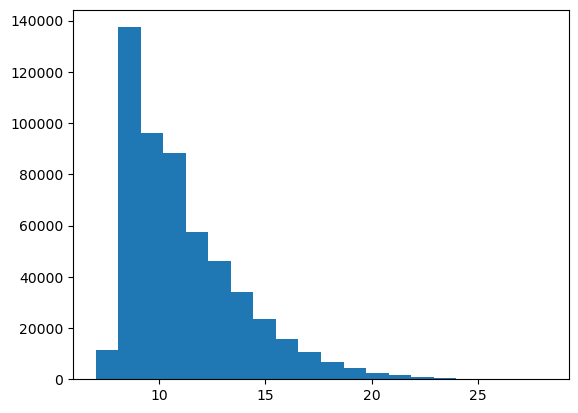

In [133]:
plt.hist(L_fr[0], bins=20)

In [27]:
from astropy.cosmology import LambdaCDM, z_at_value

In [28]:
cosmo = LambdaCDM(H0=100, Om0=0.3089, Ode0=0.6911)

In [88]:
from astropy.constants import G,c,M_sun,pc
cvel = c.value;    # Speed of light (m.s-1)
G    = G.value;    # Gravitational constant (m3.kg-1.s-2)
pc   = pc.value    # 1 pc (m)
Msun = M_sun.value # Solar mass (kg)

In [115]:
def W(zl,
      p=0.1):
    
    chi = cosmo.comoving_distance(zl)
    zmin = z_at_value(cosmo.comoving_distance, (2-p)*chi)
    zmax = z_at_value(cosmo.comoving_distance, (2+p)*chi) 
    return zmin, zmax

In [127]:
W(0.2,0.1)

(<Quantity 0.4006084 redshift>, <Quantity 0.44854882 redshift>)

In [311]:
with fits.open('/home/fcaporaso/modified_gravity/lensing/profiles/Rv10-15/TEST_LCDM_oct_rbin_0.fits') as f:
    h_LCDM = f[0].header
    p_LCDM = f[1].data
    
with fits.open('/home/fcaporaso/modified_gravity/lensing/profiles/Rv10-15/TEST_fR_rbin_0.fits') as f:
    h_fr = f[0].header
    p_fr = f[1].data

In [312]:
h_LCDM

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NVOIDS  =                 3342                                                  
CAT     = 'voids_LCDM_09.dat'                                                   
RV_MIN  =                 10.0                                                  
RV_MAX  =                 15.0                                                  
RV_MEAN =              11.9821                                                  
R1_MIN  =                 -1.0                                                  
R1_MAX  =                  1.0                                                  
R2_MIN  =                 -1.0                                                  
R2_MAX  =                100

In [313]:
h_fr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NVOIDS  =                 3398                                                  
CAT     = 'voids_fR_09.dat'                                                     
RV_MIN  =                 10.0                                                  
RV_MAX  =                 15.0                                                  
RV_MEAN =              11.9805                                                  
R1_MIN  =                 -1.0                                                  
R1_MAX  =                  1.0                                                  
R2_MIN  =                 -1.0                                                  
R2_MAX  =                100

In [314]:
covS_fr = cov_matrix(p_fr.Sigma.reshape(101,25)[1:])
covS_LCDM = cov_matrix(p_LCDM.Sigma.reshape(101,25)[1:])

In [315]:
S_fr = p_fr.Sigma.reshape(101,25)[0]
R_fr = p_fr.Rp.reshape(101,25)[0]
eS_fr = np.sqrt(np.diag(covS_fr))

S_LCDM = p_LCDM.Sigma.reshape(101,25)[0]
R_LCDM = p_LCDM.Rp.reshape(101,25)[0]
eS_LCDM = np.sqrt(np.diag(covS_LCDM))

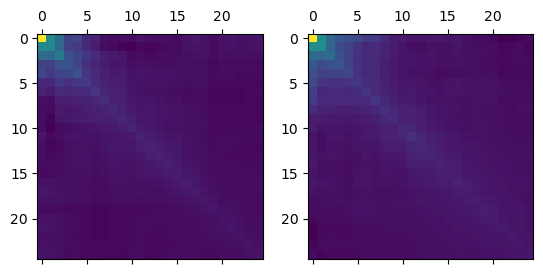

In [326]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.matshow(covS_fr)
ax2.matshow(covS_LCDM)

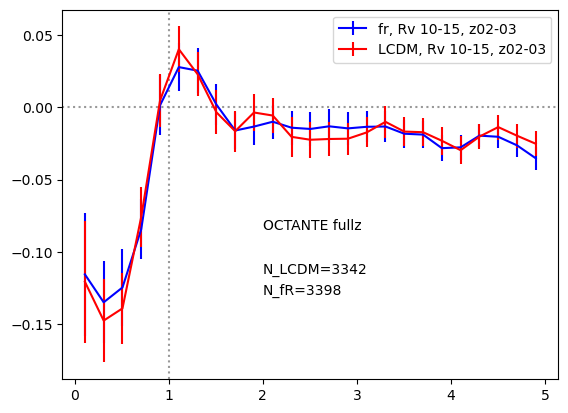

In [330]:
plt.axhline(0, ls=':', c='gray',alpha=0.8)
plt.axvline(1, ls=':', c='gray',alpha=0.8)

plt.errorbar(R_fr, S_fr, eS_fr, label='fr, Rv 10-15, z02-03', c='b')
plt.errorbar(R_LCDM, S_LCDM, eS_LCDM, label='LCDM, Rv 10-15, z02-03', c='r')
# plt.text(2, -0.1,'D=-0.9')
plt.text(2, -0.115,f'N_LCDM={h_LCDM["nvoids"]}')
plt.text(2, -0.130,f'N_fR={h_fr["nvoids"]}')
plt.text(2, -0.085, 'OCTANTE fullz')

plt.legend()
plt.show()

<ErrorbarContainer object of 3 artists>

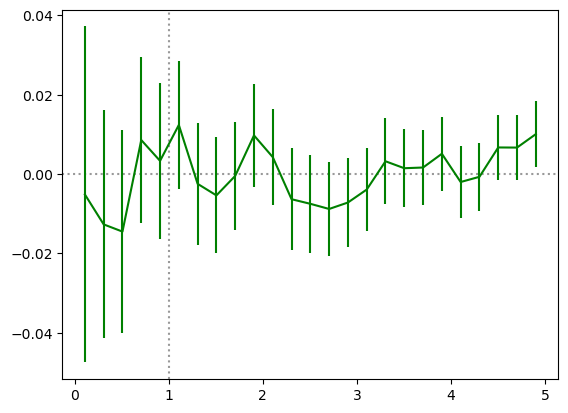

In [332]:
plt.axhline(0, ls=':', c='gray',alpha=0.8)
plt.axvline(1, ls=':', c='gray',alpha=0.8)
plt.errorbar(R_LCDM, S_LCDM-S_fr, (eS_LCDM+eS_fr)/2, label='LCDM - f(R)', c='g')


## CATS 

In [3]:
import sys
sys.path.append('/home/fcaporaso/modified_gravity/lensing/')
from maria_func import *

In [32]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [ ]:
from astropy.constants import G,c,M_sun,pc
cvel = c.value;    # Speed of light (m.s-1)
G    = G.value;    # Gravitational constant (m3.kg-1.s-2)
pc   = pc.value    # 1 pc (m)
Msun = M_sun.value # Solar mass (kg)

In [6]:
L_lcdm,_,nv_lcdm = lenscat_load(10.0, 15.0, 0.2, 0.3, -1.0, 0.0, -1.0, 100.0, 
                 flag=2.0, lensname="voids_LCDM_09.dat",
                 split=False, NSPLITS=1,
                 octant=True)
print(nv_lcdm)

3342


In [231]:
j = np.random.choice(nv_lcdm)

In [23]:
Rv, RA0, DEC0, Z, *_ = L_lcdm.T[L_lcdm[1]==3.685038][0]

In [24]:
RA0,DEC0,Z

(3.685038, 54.201012, 0.212685)

In [25]:
h=1
ROUT,RIN = 5.0, 0.01

In [269]:
Rv

<Quantity 10.76205 Mpc>

In [29]:
DEGxMPC = cosmo.arcsec_per_kpc_proper(Z).to('deg/Mpc').value
delta = (DEGxMPC*(ROUT*Rv))

In [30]:
delta

6.177851589221846

In [31]:
with fits.open('/home/fcaporaso/cats/L768/l768_gr_octant_19218.fits') as f:
    # h = f[0].header
    mask = np.abs(f[1].data.gamma1) < 10
    S = f[1].data[mask]

In [63]:
pos_angles = np.arange(0,360,90)*u.deg
c1 = SkyCoord(RA0*u.deg, DEC0*u.deg)
c2 = c1.directional_offset_by(pos_angles, delta)
# mask = (S.dec_gal < c2[0].dec.deg)&(S.dec_gal > c2[2].dec.deg)&(S.ra_gal < c2[1].ra.deg)&(
#         S.ra_gal > c2[3].ra.deg-360)&(S.true_redshift_gal > (Z+0.1))

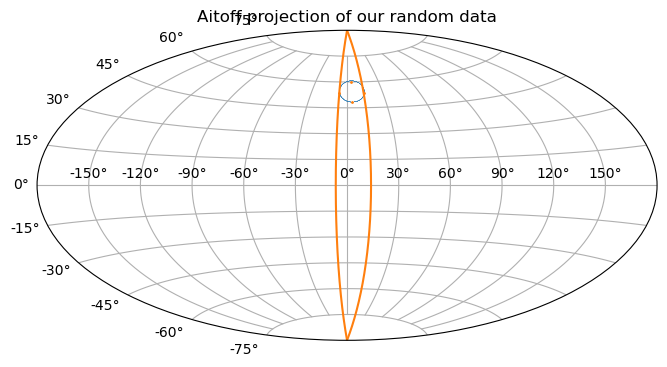

In [87]:
c3 = c1.directional_offset_by(np.arange(0,360,1)*u.deg,delta*u.deg)
ra_rad3 = c3.ra.wrap_at(180 * u.deg).radian
dec_rad3 = c3.dec.radian
ra_rad2 = c2.ra.wrap_at(180 * u.deg).radian
dec_rad2 = c2.dec.radian

plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection of our random data")
plt.grid(True)
plt.plot(ra_rad3, dec_rad3, ',', markersize=2, alpha=0.3)
plt.plot(ra_rad2, dec_rad2, '.', markersize=2, alpha=1)

plt.plot(np.full(100,ra_rad2[1]), np.arcsin(np.linspace(-1,1,100)), c='C1')
plt.plot(np.full(100,ra_rad2[3]), np.arcsin(np.linspace(-1,1,100)), c='C1')

plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

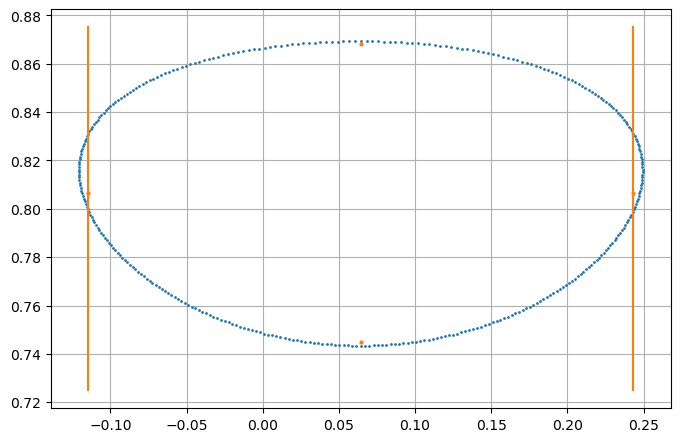

In [80]:
c3 = c1.directional_offset_by(np.arange(0,360,1)*u.deg,delta*u.deg)
ra_rad3 = c3.ra.wrap_at(180 * u.deg).radian
dec_rad3 = c3.dec.radian
ra_rad2 = c2.ra.wrap_at(180 * u.deg).radian
dec_rad2 = c2.dec.radian

plt.figure(figsize=(8,4.2))
plt.grid(True)
plt.plot(ra_rad3, np.sin(dec_rad3), '.', markersize=2, alpha=1)
plt.plot(ra_rad2, np.sin(dec_rad2), 'o', markersize=2, alpha=1)

plt.plot(np.full(100,ra_rad2[1]), np.linspace(0.725,0.875,100), c='C1')
plt.plot(np.full(100,ra_rad2[3]), np.linspace(0.725,0.875,100), c='C1')

plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

In [367]:
assert mask.sum() != 0

In [368]:
catdata = S[mask]

In [349]:
rads, theta, *_ = eq2p2(
    np.deg2rad(catdata.ra_gal), np.deg2rad(catdata.dec_gal),
    np.deg2rad(RA0), np.deg2rad(DEC0)
)

/tmp/ipykernel_117359/1745543271.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(Theta, R, Hist)


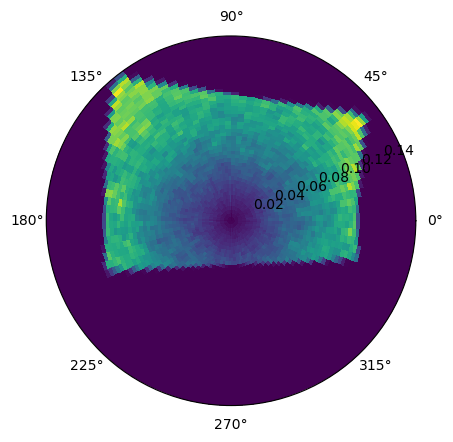

In [297]:
fig = plt.figure()
ax = fig.add_subplot(
   projection='polar'
)
nr = 50
ntheta = 100
r_edges = np.linspace(0, max(rads), nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
Hist,*_ = np.histogram2d(rads, theta, [r_edges, theta_edges])
Theta, R = np.meshgrid(theta_edges, r_edges)

ax.pcolormesh(Theta, R, Hist)

In [350]:
def SigmaCrit(zl, zs):
    
    dl  = cosmo.angular_diameter_distance(zl).value
    Dl = dl*1.e6*pc #en m
    ds  = cosmo.angular_diameter_distance(zs).value              #dist ang diam de la fuente
    dls = cosmo.angular_diameter_distance_z1z2(zl, zs).value      #dist ang diam entre fuente y lente
                
    BETA_array = dls / ds

    return (((cvel**2.0)/(4.0*np.pi*G*Dl))*(1./BETA_array))*(pc**2/Msun)

In [351]:
sigma_c = SigmaCrit(Z, catdata.true_redshift_gal)

In [352]:
# plt.hist(sigma_c)
np.isnan(sigma_c).sum()

0

In [353]:
e1 = catdata.gamma1
e2 = -1.*catdata.gamma2

#get tangential ellipticities 
et = (-e1*np.cos(2*theta)-e2*np.sin(2*theta))*sigma_c/Rv.value
#get cross ellipticities
ex = (-e1*np.sin(2*theta)+e2*np.cos(2*theta))*sigma_c/Rv.value

In [354]:
print(np.isnan(et).sum())
print(np.isnan(ex).sum())

0
0


In [355]:
r = (np.rad2deg(rads)/DEGxMPC.value)/(Rv.value)

In [356]:
# SIGMAwsum    = np.empty(ndots)
ndots = 20
bines = np.linspace(RIN,ROUT,num=ndots+1)
dig = np.digitize(r,bines)
DSIGMAwsum_T = np.empty(ndots)
DSIGMAwsum_X = np.empty(ndots)
N_inbin      = np.empty(ndots)

for nbin in range(ndots):
    mbin = dig == nbin+1              
    # SIGMAwsum[nbin]    = k[mbin].sum()
    DSIGMAwsum_T[nbin] = et[mbin].sum()
    DSIGMAwsum_X[nbin] = ex[mbin].sum()
    N_inbin[nbin]      = np.count_nonzero(mbin)

In [357]:
DSIGMAwsum_T / N_inbin

/tmp/ipykernel_117359/2802491586.py:1: RuntimeWarning: invalid value encountered in divide
  DSIGMAwsum_T / N_inbin


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])